In [1]:
from plots import two_plots, two_plot, four_plots, three_plots
import sklearn.metrics as sklm
import pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/traindata.csv')

In [3]:
lithos = pds.PredictLitho(df, None)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 9.02271e-05
[400]	valid_0's l2: 9.43978e-06
[600]	valid_0's l2: 6.22595e-06
[800]	valid_0's l2: 5.31412e-06
[1000]	valid_0's l2: 4.98137e-06
[1200]	valid_0's l2: 4.69613e-06
[1400]	valid_0's l2: 4.45737e-06
[1600]	valid_0's l2: 4.27743e-06
[1800]	valid_0's l2: 4.13631e-06
[2000]	valid_0's l2: 4.04151e-06
[2200]	valid_0's l2: 3.95393e-06
[2400]	valid_0's l2: 3.8872e-06
[2600]	valid_0's l2: 3.81539e-06
[2800]	valid_0's l2: 3.74765e-06
[3000]	valid_0's l2: 3.69964e-06
Did not meet early stopping. Best iteration is:
[3000]	valid_0's l2: 3.69964e-06
The test RMSE is : 0.0019234457545318601
The test R2 score is : 0.9999999999998485
None


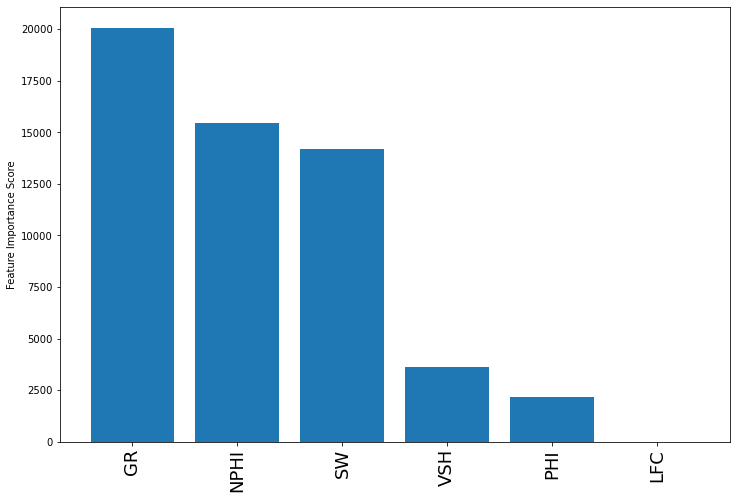

<Figure size 864x576 with 0 Axes>

In [6]:
predictions = lithos.predict('RHOB', 400, 1000, model='LGB')

In [10]:
predictions[30:40]

array([2.1214335, 2.105778 , 2.1690753, 2.231581 , 2.2184923, 2.1632674,
       2.1269367, 2.1015975, 2.0693092, 2.0734386], dtype=float32)

In [7]:
predictions[30:40]

array([2.13316457, 2.11127667, 2.16887982, 2.2483397 , 2.23251525,
       2.19061249, 2.13981826, 2.10354685, 2.08285292, 2.08091345])

In [8]:
a = df.copy()

In [9]:
a['depth'] = range(0, a.shape[0])
c = a.iloc[a[a.depth == 400].index[0]:a[a.depth == 1000].index[0]]

In [10]:
print(f'R2 score is: {sklm.r2_score(c.RHOB, predictions)}')
print(f'RMSE is: {sklm.mean_squared_error(c.RHOB, predictions) ** 0.5}')

R2 score is: 0.940913571197763
RMSE is: 0.0131793150174434


In [11]:
a1 = a.iloc[a[a.depth == 400].index[0]:a[a.depth == 1000].index[0]]


In [12]:
from sklearn.metrics import mean_squared_error, accuracy_score

mean_squared_error(a1.RHOB, predictions) ** 0.5

0.0131793150174434

In [13]:
c['predictions'] = predictions

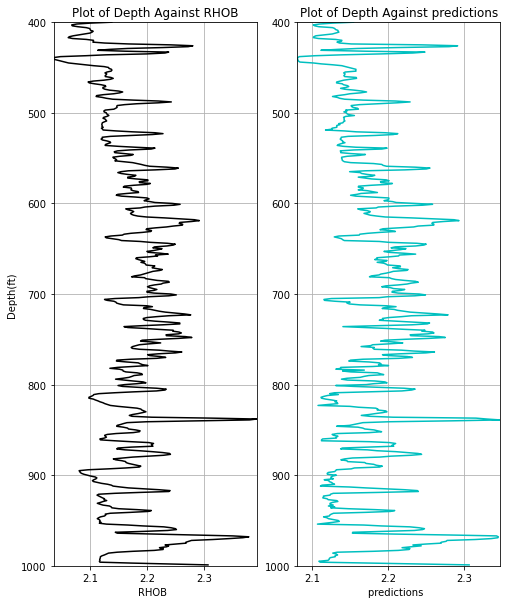

In [14]:
two_plot(c, 'RHOB', 'predictions', top=400, base=1000,)

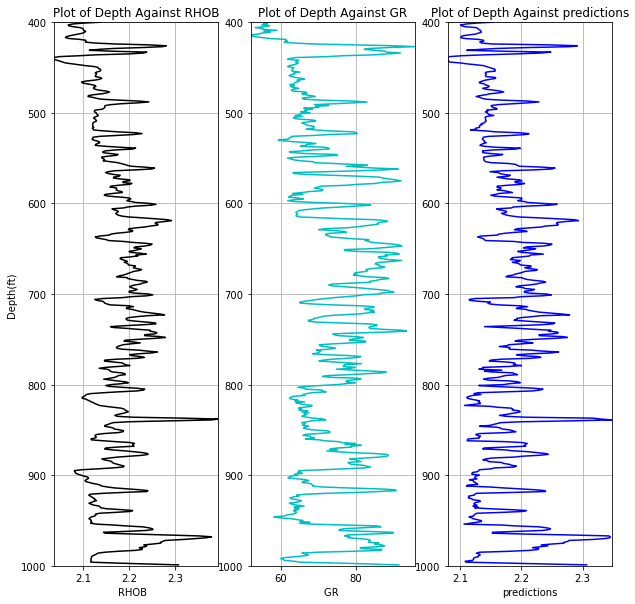

In [15]:
three_plots(c, 'RHOB', 'GR', 'predictions', 400, 1000)

In [1]:
from sklearn.metrics import f1_score, accuracy_score
from plots import two_plots, four_plots
import sklearn.metrics as sklm
import pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def show_evaluation(pred, true):

  '''

  function to show model performance and evaluation
  args:
    pred: predicted value(a list)
    true: actual values (a list)

  prints the custom metric performance, accuracy and F1 score of predictions

  '''

  print(f'Default score: {score(true.values, pred)}')
  print(f'Accuracy is: {accuracy_score(true, pred) * 100}%')
  print(f'F1 is: {f1_score(pred, true.values, average="weighted") * 100}%')

def score(y_true, y_pred):

    '''
    custom metric used for evaluation
    args:
      y_true: actual prediction
      y_pred: predictions made
    '''

    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

 
lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}
A = np.load('data/penalty_matrix.npy')

In [3]:
df = pd.read_csv('hidden_test.csv.txt', sep=';')

In [9]:
df = pd.read_csv('leaderboard_test_features.csv.txt', sep=';')

In [10]:
facies = pds.DataHandlers(df)
df1 = facies.set_mnemonics()

In [11]:
facies = pds.PredictLabels(df1, 'DEPTH_MD')

In [12]:
predictions = facies.predict('FORCE_2020_LITHOFACIES_LITHOLOGY', 0, df1.shape[0])

Augmenting features...
Shape of dataframe before augmentation: (136786, 22)
Shape of dataframe after augmentation: (136786, 88)
Model 1, predicting...
Model 2, predicting...
Model 3, predicting...
Model 4, predicting...
Predictions complete!


In [7]:
np.unique(predictions, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([14160,  6377, 79449,  3826,    10,  8402,  1530,  6536,   633,
         1293,   181], dtype=int64))

In [8]:
np.unique(predictions, return_counts=True)

(array([ 0,  1,  2,  3,  5,  9, 10], dtype=int64),
 array([24458,  4964, 82945,   885,  8630,   332,   183], dtype=int64))

In [13]:
labels = pd.read_csv('leaderboard_test_target.csv.txt', sep=';')

In [14]:
labels = labels.FORCE_2020_LITHOFACIES_LITHOLOGY

labels = labels.map(lithology_numbers)

In [8]:
show_evaluation(predictions, labels)   # hidden test data

Default score: -0.4877192659950816
Accuracy is: 79.89656609230619%
F1 is: 81.57784042962368%


In [15]:
show_evaluation(predictions, labels)   # open test data

Default score: -0.53365658766248
Accuracy is: 79.25738014124252%
F1 is: 81.4684657032886%


In [ ]:
test = pds.DataHandlers(df1)
df2 = test()

In [9]:
df3 = facies.set_mnemonics('NPHI', 'RHOB', 'RMED', 'GR')

In [13]:
df4 = pd.DataFrame()
df4['RHOB'] = df3['RHOB']
df4['GR'] = df3['GR']
df4['RT'] = df3['RT']
df4['NPHI'] = df3['NPHI']

df4.head()

,RHOB,GR,RT,NPHI
0,1.884186,NaN,1.611410,80.200851
1,1.889794,NaN,1.618070,79.262886
2,1.896523,NaN,1.626459,74.821999
3,1.891913,NaN,1.621594,72.878922
4,1.880034,NaN,1.602679,71.729141
